In [1]:
pip install yfinance pandas plotly

In [22]:
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

In [3]:
 pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00


In [4]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Creating Candlestick

In [18]:
import pandas as pd
import yfinance as yf
import cufflinks as cf

In [41]:
# Fetch the data for BBRI.JK from January 1, 2018 to December 31, 2023
stock_data = yf.download('BBRI.JK', start='2023-01-01', end='2023-12-31')

# Ensure that the index is in local time (optional, if you want local timezone, e.g., Asia/Jakarta)
stock_data.index = stock_data.index.tz_convert('Asia/Jakarta')

[*********************100%***********************]  1 of 1 completed


In [42]:
# Print the column names of stock_data
print(stock_data.columns)

MultiIndex([('Adj Close', 'BBRI.JK'),
            (    'Close', 'BBRI.JK'),
            (     'High', 'BBRI.JK'),
            (      'Low', 'BBRI.JK'),
            (     'Open', 'BBRI.JK'),
            (   'Volume', 'BBRI.JK')],
           names=['Price', 'Ticker'])


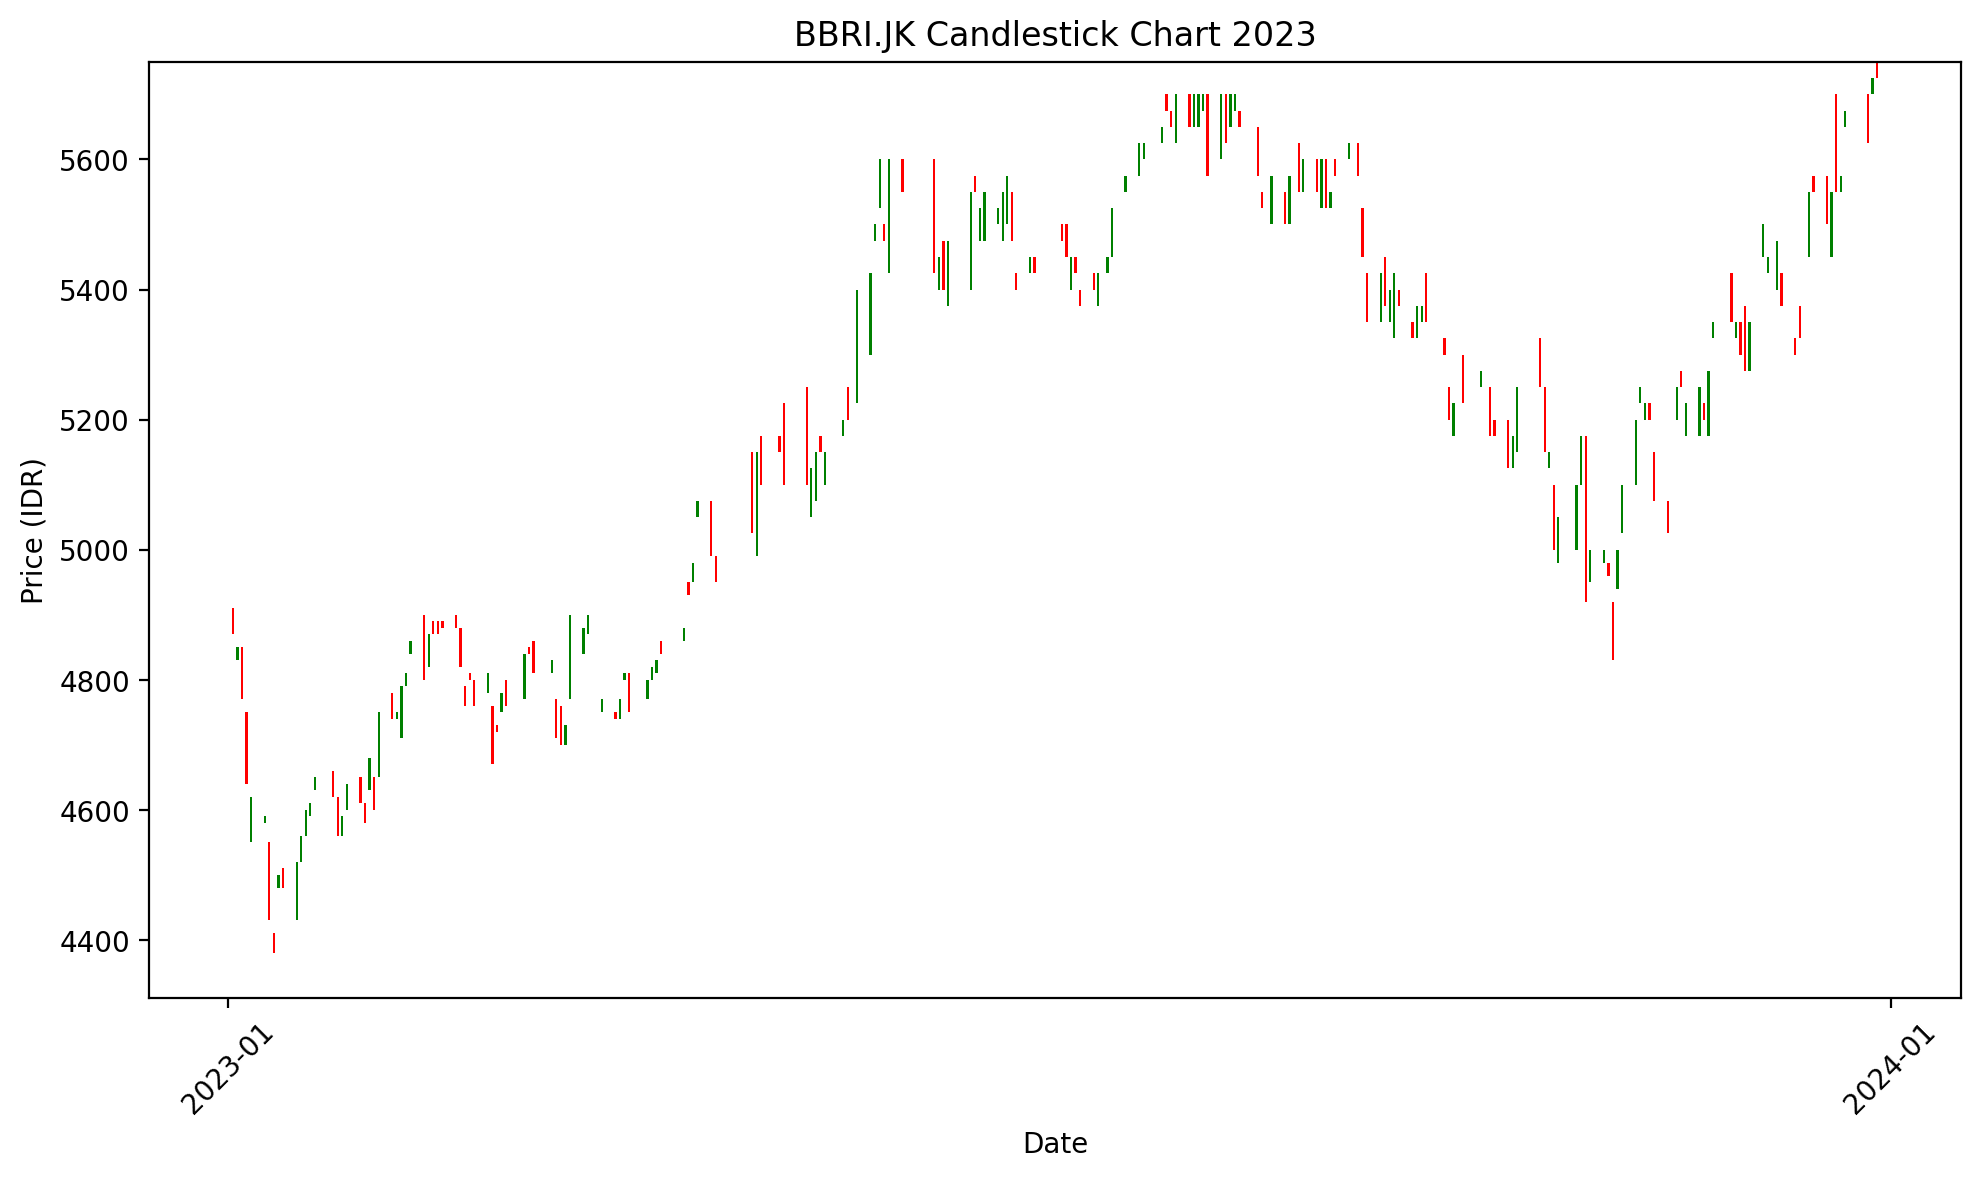

In [47]:
# Drop any rows with missing values in the relevant columns
stock_data.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

# Ensure that the index is in the proper datetime format
stock_data.index = pd.to_datetime(stock_data.index)

# Create the candlestick chart using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Create up (green) and down (red) indicators
up = stock_data[stock_data['Close'] >= stock_data['Open']]
down = stock_data[stock_data['Close'] < stock_data['Open']]

# Plot up and down candles
ax.bar(up.index, up['Close'] - up['Open'], bottom=up['Open'], color='green', width=0.5)
ax.bar(down.index, down['Close'] - down['Open'], bottom=down['Open'], color='red', width=0.5)

# Customize the plot
ax.set_title('BBRI.JK Candlestick Chart 2023')
ax.set_xlabel('Date')
ax.set_ylabel('Price (IDR)')

# Format the date on the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#Backtesting a Strategy Based on Simple Moving Average

In [131]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download the stock data for BBRI.JK
data = yf.download('BBRI.JK', start='2018-01-01', end='2023-12-31')

# Step 2: Calculate the Simple Moving Averages (50 and 200-day)
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

# Step 3: Create Buy/Sell signals
data['Signal'] = 0
data['Signal'][50:] = 0  # No signals before 50-day moving average is calculated

# Buy when SMA50 crosses above SMA200
data.loc[data['SMA50'] > data['SMA200'], 'Signal'] = 1  # Buy Signal

# Sell when SMA50 crosses below SMA200
data.loc[data['SMA50'] < data['SMA200'], 'Signal'] = -1  # Sell Signal

# Step 4: Initialize Portfolio
initial_cash = 10000
cash = initial_cash
shares = 0
portfolio_value = []
cash_balance = []

[*********************100%***********************]  1 of 1 completed


In [137]:
print(f"current_signal: {current_signal}, current_price: {current_price}")

current_signal: 1, current_price: Ticker
BBRI.JK    3372.668945
Name: 2018-12-04 00:00:00+00:00, dtype: float64


In [138]:
# Step 5: Implement Strategy Logic
for i in range(200, len(data)):  # Start from 200th row to ensure SMA200 is calculated
    # Using iloc for index-based position access
    current_signal = data.iloc[i]['Signal']
    current_price = data.iloc[i]['Close']

    # Ensure we're working with scalar values for comparison
    # Access the scalar value of the Series using .item()
    if current_signal.item() == 1 and cash >= current_price.item():
        shares_to_buy = cash // current_price.item()  # Max number of shares we can buy
        shares += shares_to_buy
        cash -= shares_to_buy * current_price.item()  # Subtract cash spent on shares

    elif current_signal.item() == -1 and shares > 0:
        cash += shares * current_price.item()  # Add cash from selling shares
        shares = 0

    # Calculate portfolio value (cash + value of shares)
    portfolio_value.append(cash + shares * current_price.item())
    cash_balance.append(cash)

In [149]:
# Step 6: Results

# Adjust portfolio_value and cash_balance length to match the number of rows from index 200
portfolio_length = len(data) - 200  # The number of data points from row 200 onwards

# Ensure portfolio_value and cash_balance have the correct length
portfolio_value = portfolio_value[:portfolio_length]
cash_balance = cash_balance[:portfolio_length]

# Create a DataFrame for the portfolio and cash balance, indexed from data's 200th row onwards
portfolio_df = pd.DataFrame({'Portfolio': portfolio_value, 'Cash Balance': cash_balance},
                             index=data.index[200:200 + len(portfolio_value)])

# Reset the index of data to make sure it has a single-level index for merging
data_reset = data.reset_index(drop=True)

# Align and assign the portfolio values only to the relevant rows in data_reset
data_reset.loc[200:200 + len(portfolio_df) - 1, 'Portfolio'] = portfolio_df['Portfolio'].values
data_reset.loc[200:200 + len(portfolio_df) - 1, 'Cash Balance'] = portfolio_df['Cash Balance'].values

# Calculate the final portfolio value after the backtest
final_value = portfolio_value[-1]

# Display the initial and final portfolio values
print(f"Starting Portfolio Value: {initial_cash:.2f}")
print(f"Final Portfolio Value: {final_value:.2f}")

Starting Portfolio Value: 10000.00
Final Portfolio Value: 8431.41


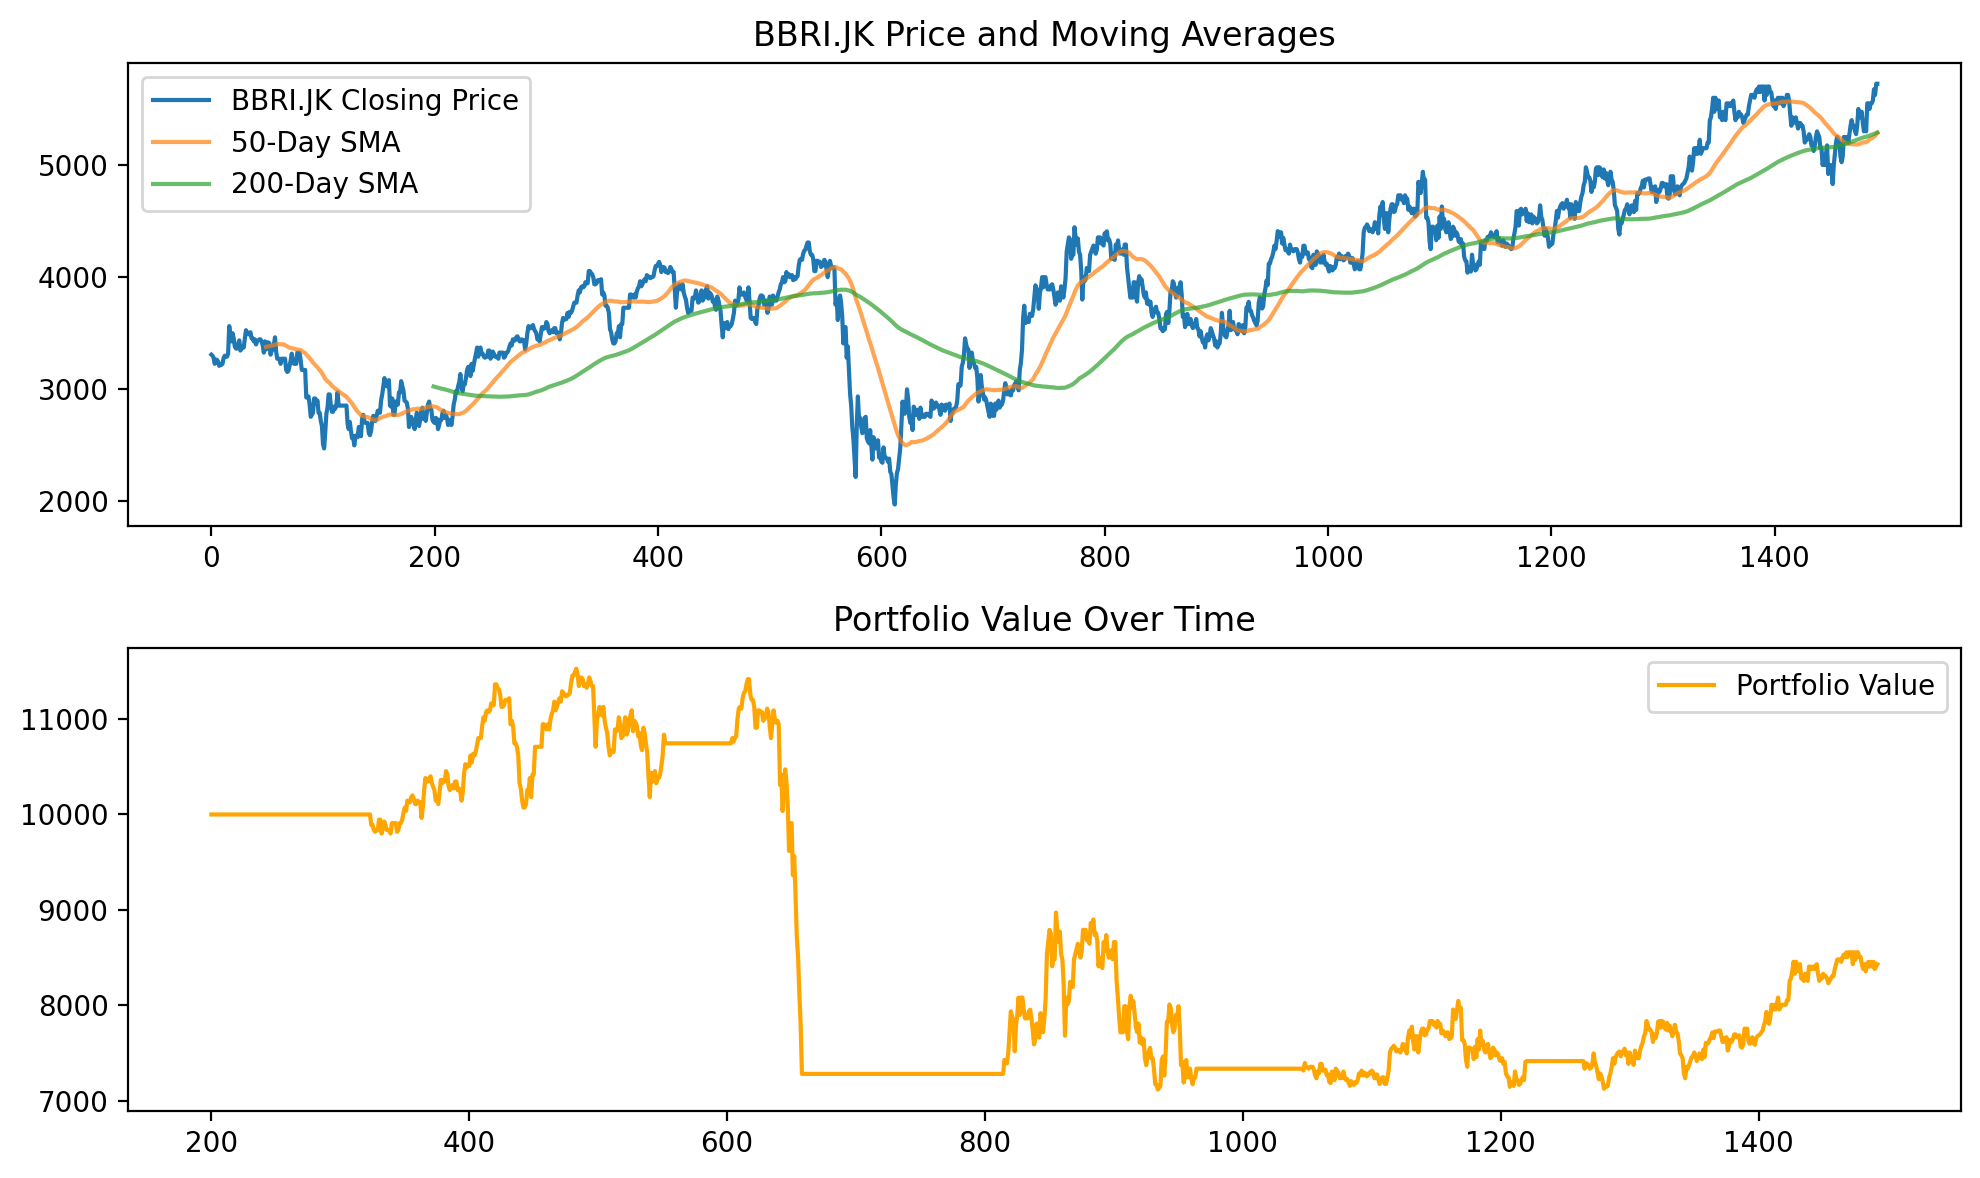

In [152]:
# Step 7: Plotting the Results

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the closing price and moving averages
plt.subplot(2, 1, 1)
plt.plot(data_reset['Close'], label='BBRI.JK Closing Price')
plt.plot(data_reset['SMA50'], label='50-Day SMA', alpha=0.7)
plt.plot(data_reset['SMA200'], label='200-Day SMA', alpha=0.7)
plt.title('BBRI.JK Price and Moving Averages')
plt.legend(loc='best')

# Plot portfolio value
plt.subplot(2, 1, 2)
plt.plot(data_reset['Portfolio'], label='Portfolio Value', color='orange')
plt.title('Portfolio Value Over Time')
plt.legend(loc='best')

# Show the plots
plt.tight_layout()
plt.show()

#Calculating the relative strength index and testing a long/short strategy

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    # Calculate the daily price changes
    delta = data.diff()

    # Separate the gains (positive) and losses (negative)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    # Calculate the Relative Strength (RS)
    rs = gain / loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Step 2: Calculate the RSI for the 'Close' prices
data_reset['RSI'] = calculate_rsi(data_reset['Close'], window=14)

# Step 3: Create Long/Short signals
# Long when RSI crosses below 30 (oversold), Short when RSI crosses above 70 (overbought)
data_reset['LongSignal'] = data_reset['RSI'] < 30
data_reset['ShortSignal'] = data_reset['RSI'] > 70

In [175]:
# Step 4: Implement the Long/Short strategy (Improved)
initial_cash = 10000  # Starting portfolio value
cash = initial_cash
shares = 0
portfolio_value_rsi = []
cash_balance_rsi = []
in_trade = False  # Flag to track if we are currently in a trade

# Loop over the data and calculate portfolio performance
for i in range(200, len(data_reset)):
    current_price = data_reset['Close'].iloc[i]

    # Long signal: Buy if not in a trade and RSI is below 30
    if data_reset['LongSignal'].iloc[i] and not in_trade and cash >= current_price:
        shares_to_buy = cash // current_price
        shares += shares_to_buy
        cash -= shares_to_buy * current_price
        in_trade = True  # Set the flag to indicate we are in a trade

    # Short signal: Sell (or close long position) if in a trade and RSI is above 70
    elif data_reset['ShortSignal'].iloc[i] and in_trade and shares > 0:
        cash += shares * current_price
        shares = 0
        in_trade = False  # Reset the flag to indicate we are no longer in a trade

    # Track portfolio value and cash balance
    portfolio_value_rsi.append(shares * current_price + cash)
    cash_balance_rsi.append(cash)

# Create a DataFrame to hold portfolio values and cash balance
portfolio_df_rsi = pd.DataFrame({
    'Portfolio': portfolio_value_rsi,
    'Cash Balance': cash_balance_rsi
}, index=data_reset.index[200:200 + len(portfolio_value_rsi)])

# Ensure the index aligns with the data_reset DataFrame before assigning the portfolio values
data_reset = data_reset.iloc[200:].reset_index(drop=True)

# Assign the portfolio values to data_reset
data_reset['Portfolio_RSI'] = portfolio_df_rsi['Portfolio'].values
data_reset['Cash Balance_RSI'] = portfolio_df_rsi['Cash Balance'].values

# Final Portfolio Value after the strategy
final_value_rsi = portfolio_value_rsi[-1]

# Access the numerical value from the Series using .iloc[0] or .item()
final_value_rsi = final_value_rsi.iloc[0] if isinstance(final_value_rsi, pd.Series) else final_value_rsi # Change this line


print(f"Starting Portfolio Value: {initial_cash:.2f}")
print(f"Final Portfolio Value (RSI Strategy): {final_value_rsi:.2f}")

Starting Portfolio Value: 10000.00
Final Portfolio Value (RSI Strategy): 10000.00


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



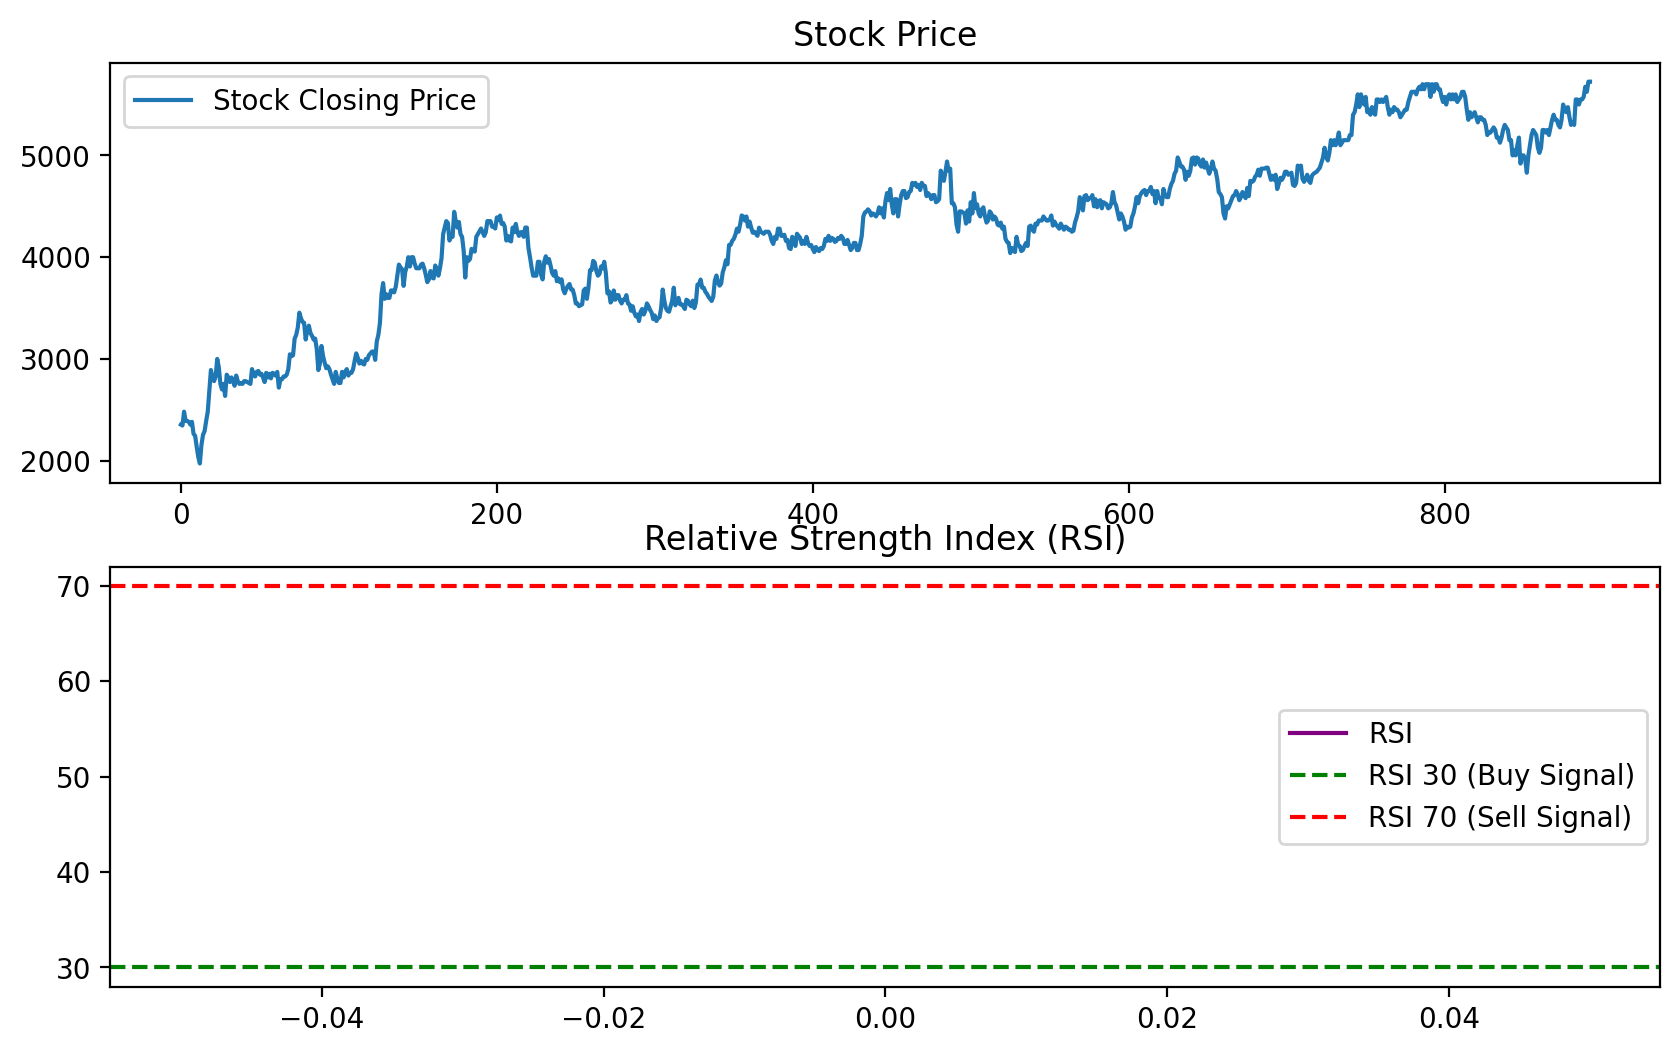

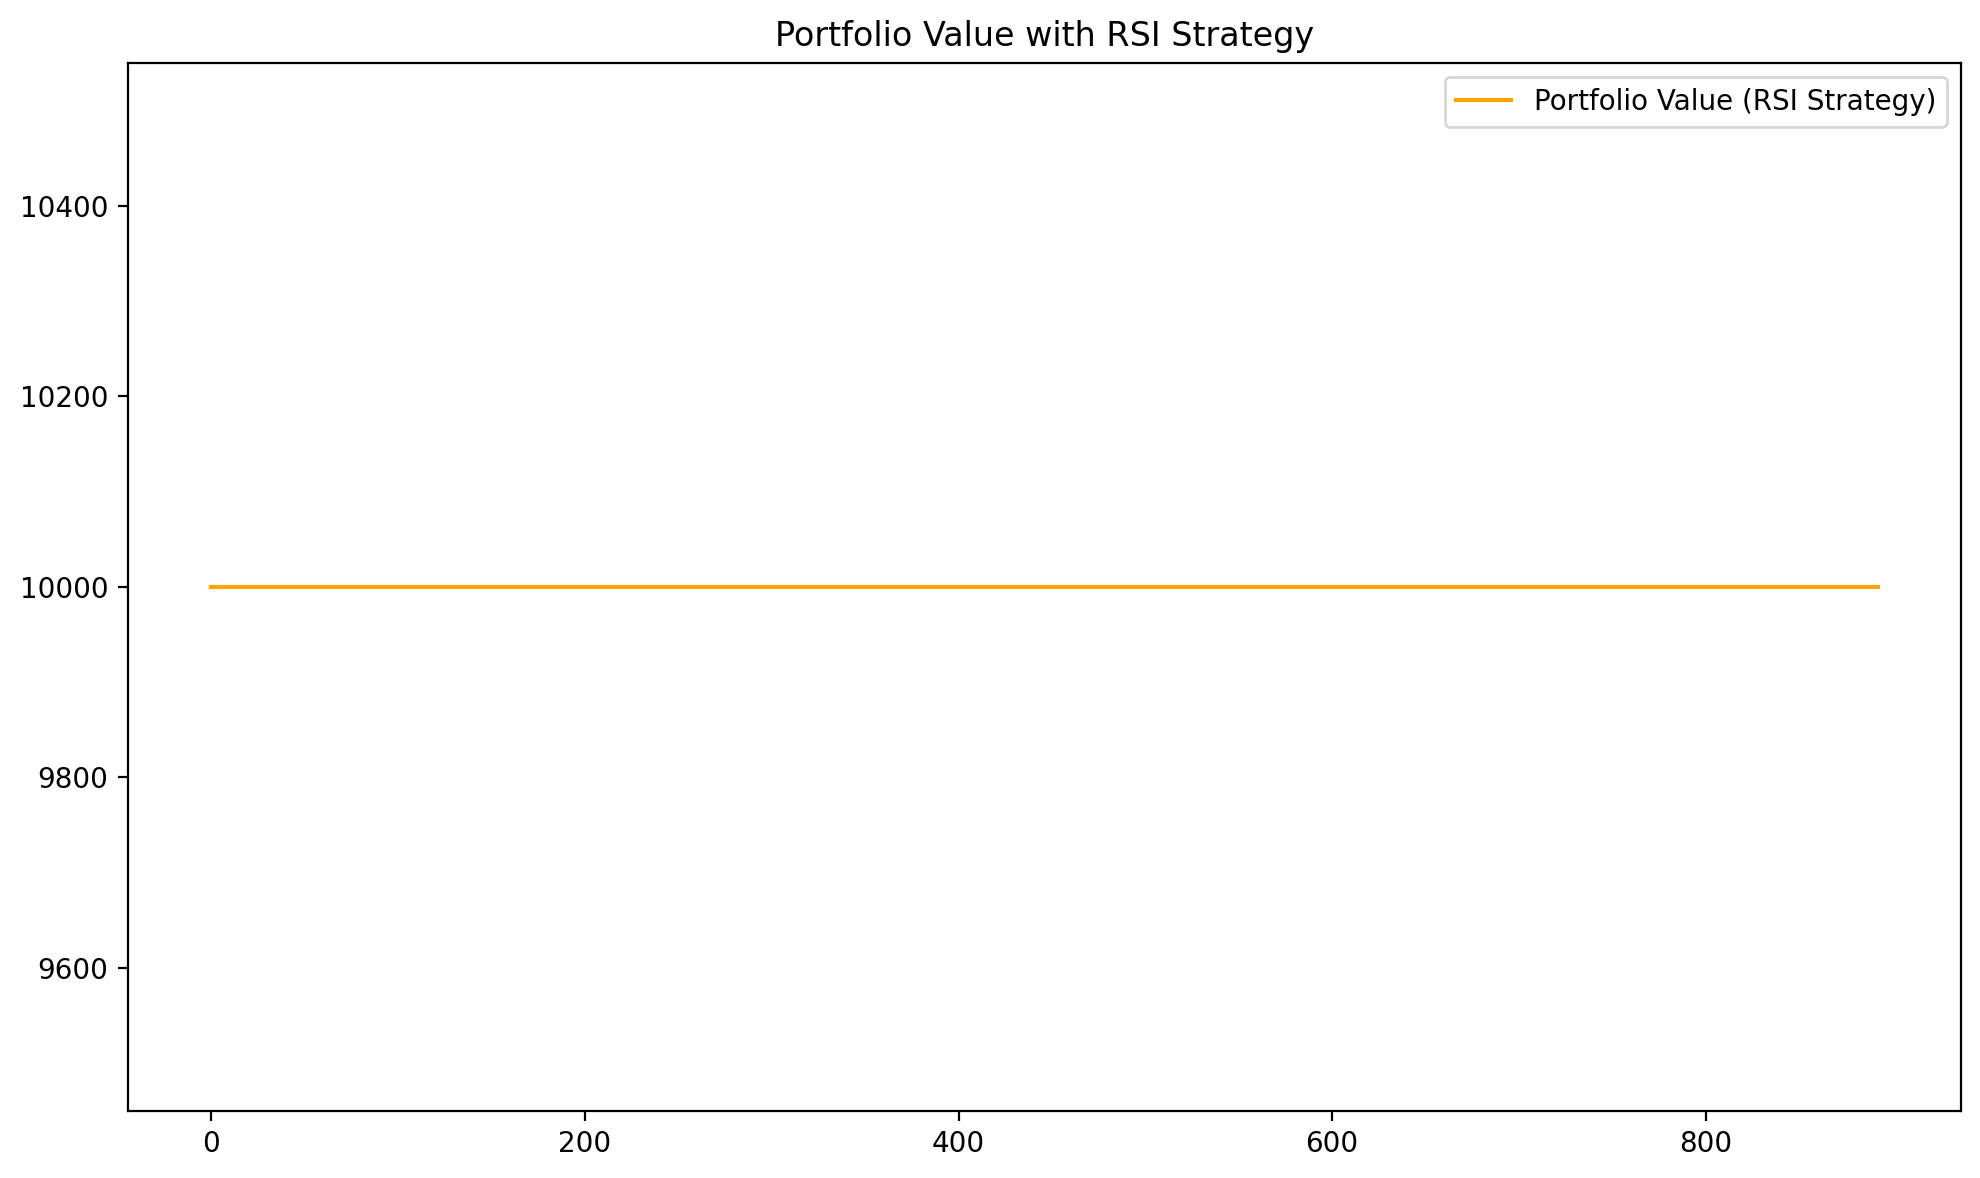

In [166]:
# Step 5: Plot the results

plt.figure(figsize=(10, 6))

# Plotting closing price and RSI
plt.subplot(2, 1, 1)
plt.plot(data_reset['Close'], label='Stock Closing Price')
plt.title('Stock Price')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(data_reset['RSI'], label='RSI', color='purple')
plt.axhline(30, color='green', linestyle='--', label='RSI 30 (Buy Signal)')
plt.axhline(70, color='red', linestyle='--', label='RSI 70 (Sell Signal)')
plt.title('Relative Strength Index (RSI)')
plt.legend(loc='best')

# Plotting Portfolio value
plt.figure(figsize=(10, 6))
plt.plot(data_reset['Portfolio_RSI'], label='Portfolio Value (RSI Strategy)', color='orange')
plt.title('Portfolio Value with RSI Strategy')
plt.legend(loc='best')

plt.tight_layout()
plt.show()